In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [14]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
# Reshape the data to add a channel dimension (required for CNNs)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [17]:
# Improved CNN Model Architecture
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the output for the Dense layers
    layers.Flatten(),
    
    # Fully Connected (Dense) Layers
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

In [18]:
# Compile the Model
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images by up to 10 degrees
    zoom_range=0.1,     # Zoom in/out by up to 10%
    width_shift_range=0.1,  # Shift images horizontally by up to 10%
    height_shift_range=0.1, # Shift images vertically by up to 10%
)


In [20]:
datagen.fit(x_train)

In [21]:
# Train the Model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=25,
                    validation_data=(x_test, y_test))

Epoch 1/25


e:\Deep Learning\noneeee\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.7506 - loss: 0.7964 - val_accuracy: 0.9579 - val_loss: 0.1424
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9434 - loss: 0.2042 - val_accuracy: 0.9717 - val_loss: 0.0912
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9552 - loss: 0.1615 - val_accuracy: 0.9752 - val_loss: 0.0827
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9617 - loss: 0.1421 - val_accuracy: 0.9774 - val_loss: 0.0763
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9645 - loss: 0.1360 - val_accuracy: 0.9834 - val_loss: 0.0638
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9666 - loss: 0.1204 - val_accuracy: 0.9843 - val_loss: 0.0548
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9678 - loss: 0.1263 - val_accuracy: 0.9819 - val_loss: 0.0597
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9673 - loss: 0.11

In [22]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.9886 - loss: 0.0382
Test Accuracy: 0.9886


In [23]:
# Step 7: Make Predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [24]:
# Visualize some predictions
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = tf.argmax(predictions_array[i])
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{predicted_label} ({100 * tf.reduce_max(predictions_array[i]):.2f}%)", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = tf.argmax(predictions_array[i])
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


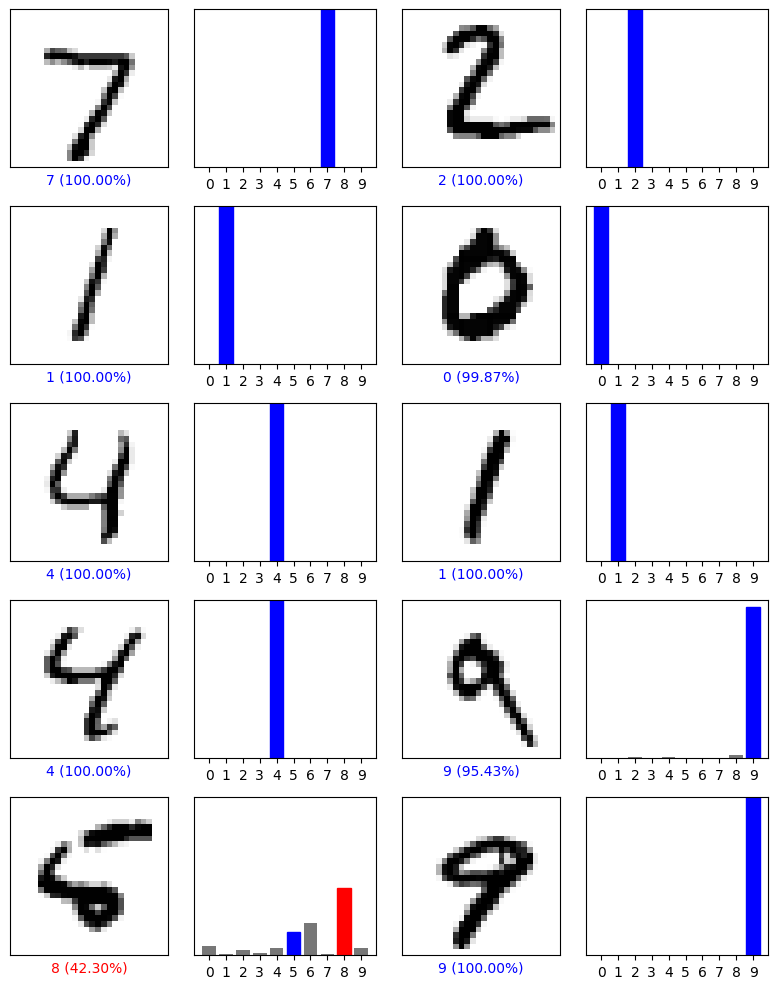

In [25]:
# Plot the first 5 test images with their predictions
num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, y_test)
plt.tight_layout()
plt.show()

In [26]:
model.save('mnist_cnn_model.h5')